In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("diyabet.csv")
df1=pd.read_csv("diyabet.csv")
df2=pd.read_csv("diyabet.csv")

Değişkenler:

Pregnancies – Hamilelik sayısı,

Glucose – Glikoz değeri,

SkinThickness – Cilt Kalınlığı,

Insulin – 2 saatlik serum insülini (mu U/ml)

Blood Pressure – Kan Basıncı (Küçük tansiyon) (mm Hg),

DiabetesPedigreeFunction– Aile öyküsüne dayalı olarak diyabet olasılığını puanlayan bir fonksiyon 

Age – Yaş (yıl),

Outcome– Hastalığa sahip (1) ya da değil (0)

Amaç: Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını 
tahmin edebilecek bir makine öğrenmesi modeli geliştirmek.

In [5]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


Veri setinde bazı gözlemlerde insülin değerleri 0 olarak girilmiş. 
Bir kişinin insülin değerinin 0 olması mümkün değildir
anlaşılan insülin değerlerine bakılmayan kişilerin insülin değerleri, 
sıfır olarak girilmiş; bunlar nan olarak değiştirilir. 
Aynı sorunun olduğu diğer columnlarda da böyle bir değişiklik yapılır.

In [6]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [12]:
df[["PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI"]] = df[["PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI"]].replace(0,np.NaN)

In [13]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,15000.0,1.502922e+06,289253.443471,1.000038e+06,1.252866e+06,1.505508e+06,1.755205e+06,1.999997e+06
Pregnancies,15000.0,3.224533e+00,3.391020,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
PlasmaGlucose,15000.0,1.078569e+02,31.981975,4.400000e+01,8.400000e+01,1.040000e+02,1.290000e+02,1.920000e+02
DiastolicBloodPressure,15000.0,7.122067e+01,16.758716,2.400000e+01,5.800000e+01,7.200000e+01,8.500000e+01,1.170000e+02
TricepsThickness,15000.0,2.881400e+01,14.555716,7.000000e+00,1.500000e+01,3.100000e+01,4.100000e+01,9.300000e+01
SerumInsulin,15000.0,1.378521e+02,133.068252,1.400000e+01,3.900000e+01,8.300000e+01,1.950000e+02,7.990000e+02
BMI,15000.0,3.150965e+01,9.759000,1.820051e+01,2.125989e+01,3.176794e+01,3.925969e+01,5.603463e+01
DiabetesPedigree,15000.0,3.989677e-01,0.377944,7.804379e-02,1.377433e-01,2.002971e-01,6.162851e-01,2.301594e+00
Age,15000.0,3.013773e+01,12.089703,2.100000e+01,2.200000e+01,2.400000e+01,3.500000e+01,7.700000e+01
Diabetic,15000.0,3.333333e-01,0.471420,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [20]:
df.corr().T

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,1.000000,0.006774,-0.001858,0.008746,-0.002406,-0.020698,-0.003156,-0.015413,-0.007096,-0.012494
Pregnancies,0.006774,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,-0.001858,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.008746,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,-0.002406,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,-0.020698,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,-0.003156,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,-0.015413,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,-0.007096,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,-0.012494,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

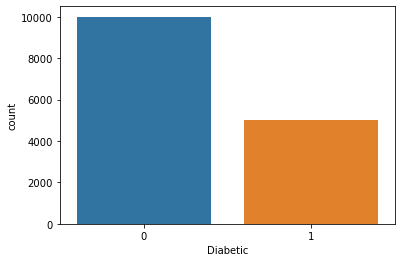

In [22]:
sns.countplot(df['Diabetic'],label="Count")

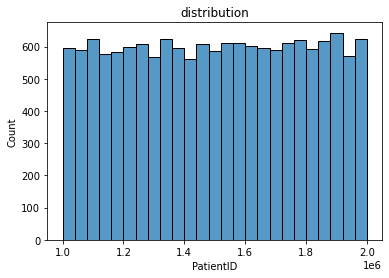

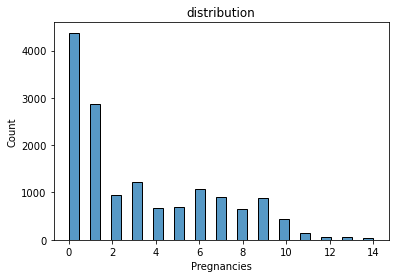

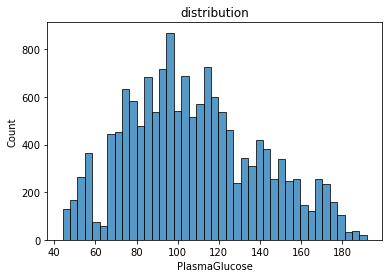

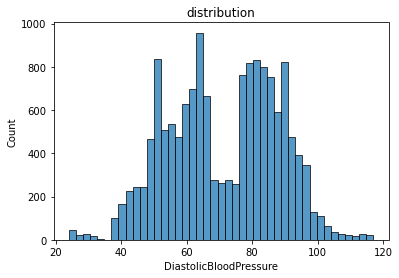

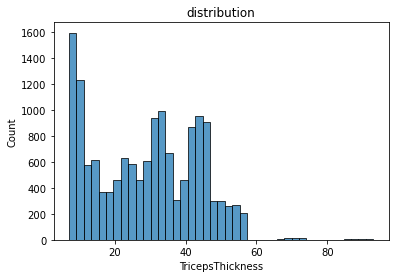

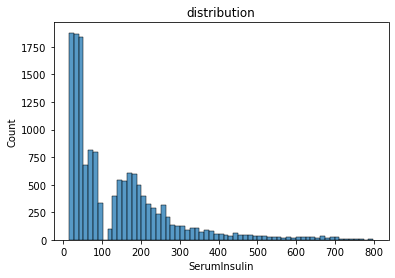

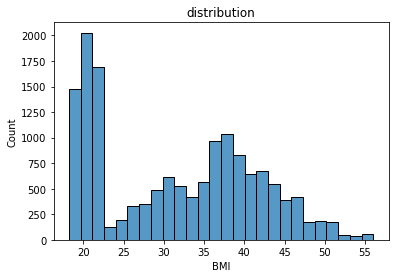

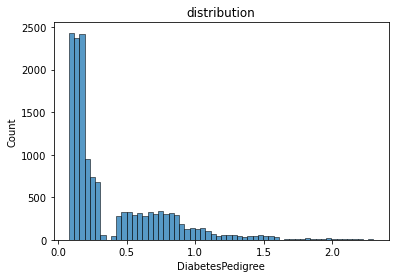

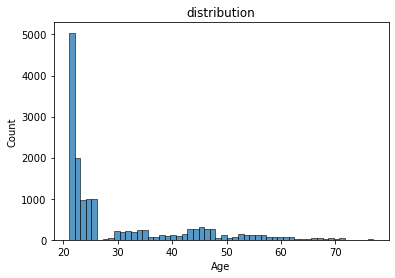

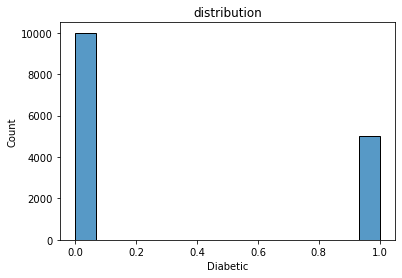

In [24]:
for i in df.columns:
    sns.histplot(x=df[i], data=df)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

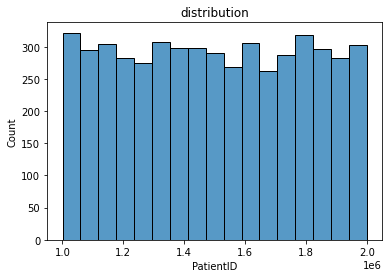

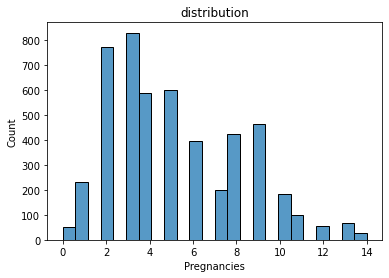

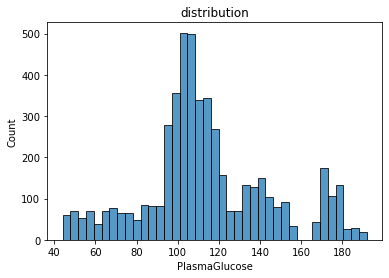

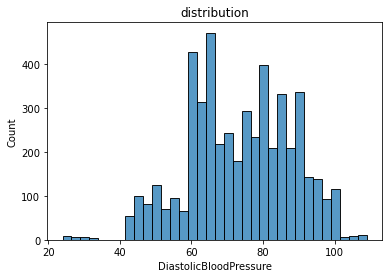

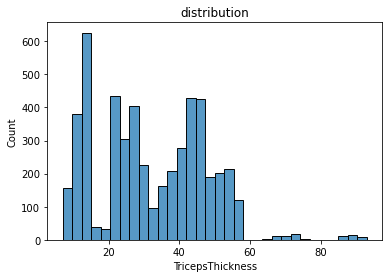

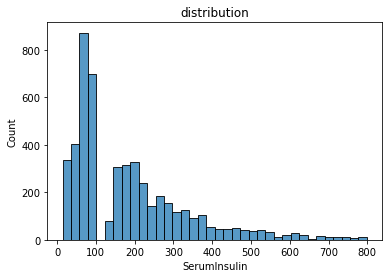

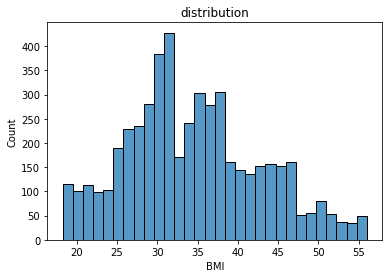

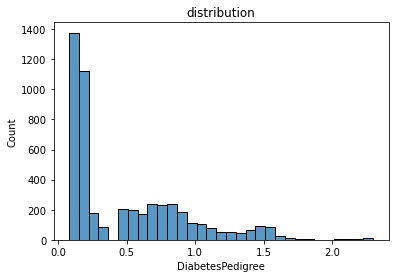

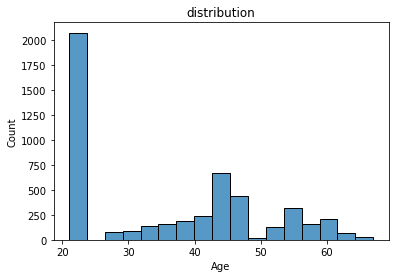

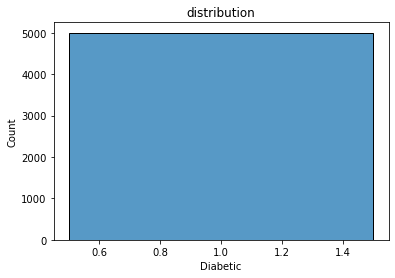

In [42]:
diabet1=df[(df["Diabetic"]==1)]

for i in diabet1.columns:
    sns.histplot(x=diabet1[i], data=diabet1)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

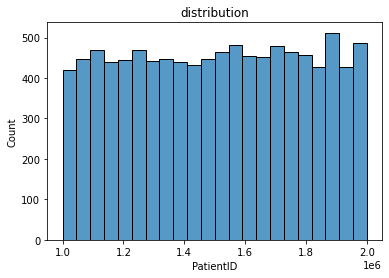

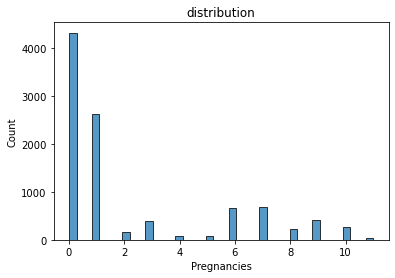

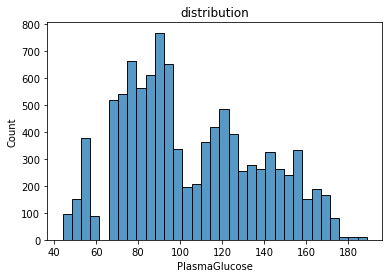

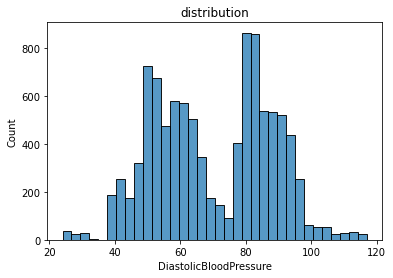

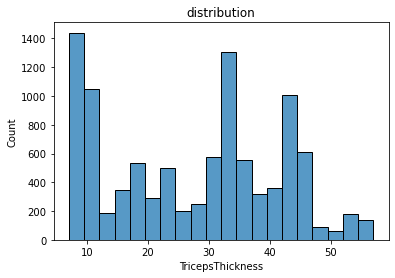

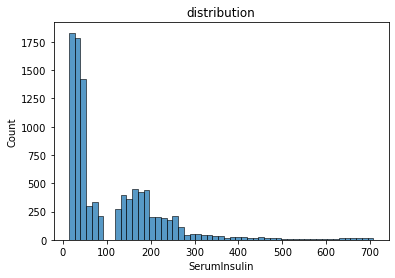

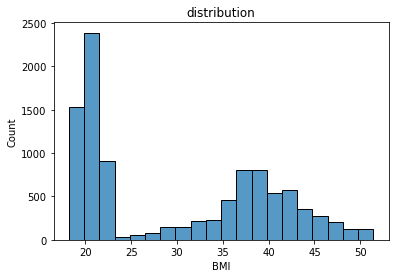

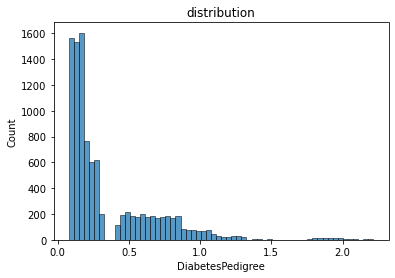

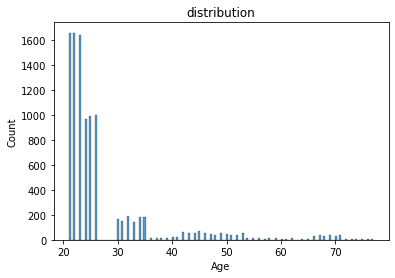

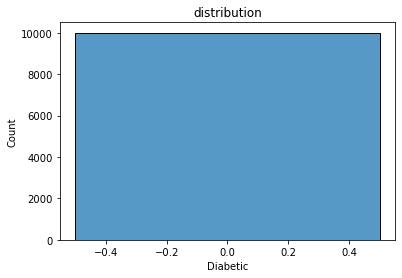

In [43]:
diabet0=df[(df["Diabetic"]==0)]

for i in diabet0.columns:
    sns.histplot(x=diabet0[i], data=diabet0)
    plt.title("distribution")
    plt.xlabel(i)
    plt.show()

In [47]:
def IQR_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df
     
def Box_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df, color= clr)
  plt.show()

def hist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.hist(df, color =clr)
  plt.title("Histogram Plot")
  plt.show()

def dist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Distribution Plot")
  sns.distplot(df,color= clr)
  sns.despine()
  plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


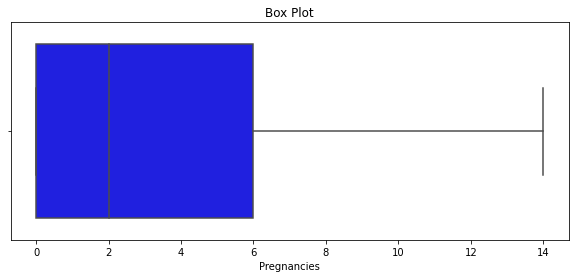

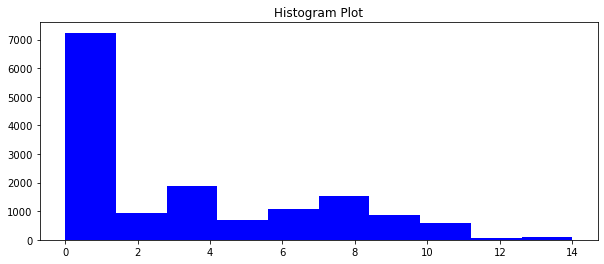

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


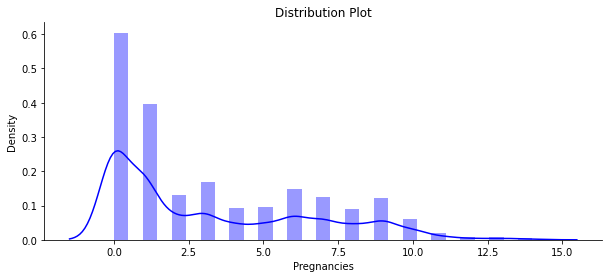

In [48]:
df2 = df2.pipe(IQR_outliers, 'Pregnancies')
Box_plots(df2["Pregnancies"],"blue")
hist_plots(df2["Pregnancies"],"blue")
dist_plots(df2["Pregnancies"],"blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


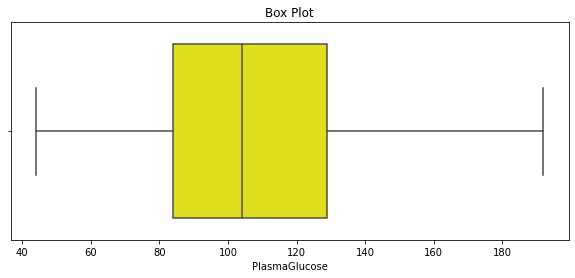

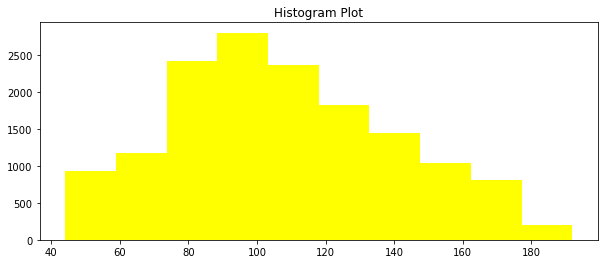

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


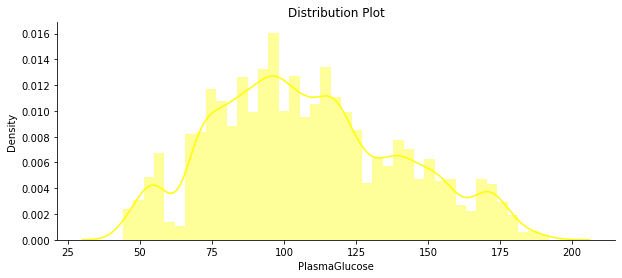

In [49]:
df2 = df2.pipe(IQR_outliers, 'PlasmaGlucose')
Box_plots(df2["PlasmaGlucose"],"yellow")
hist_plots(df2["PlasmaGlucose"],"yellow")
dist_plots(df2["PlasmaGlucose"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


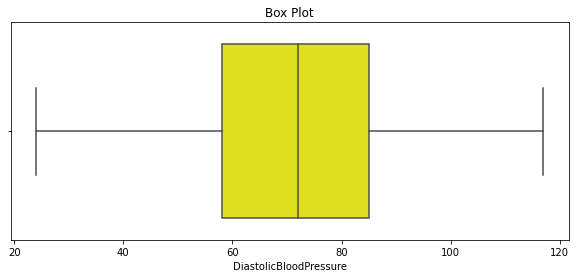

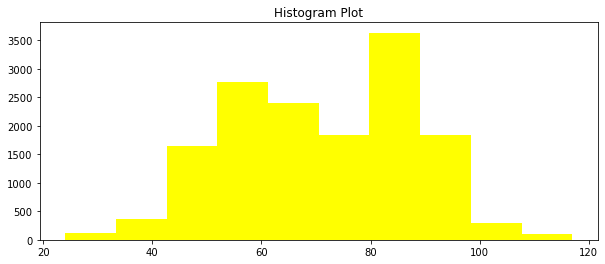

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


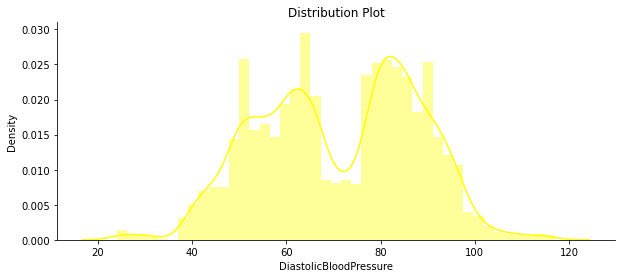

In [50]:
df2 = df2.pipe(IQR_outliers, 'DiastolicBloodPressure')
Box_plots(df2["DiastolicBloodPressure"],"yellow")
hist_plots(df2["DiastolicBloodPressure"],"yellow")
dist_plots(df2["DiastolicBloodPressure"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


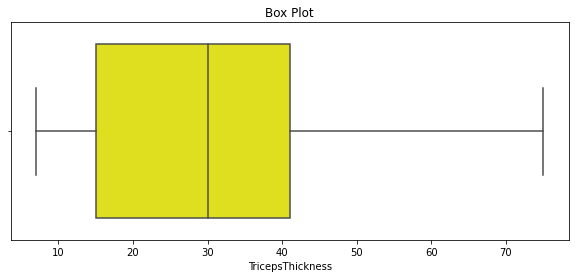

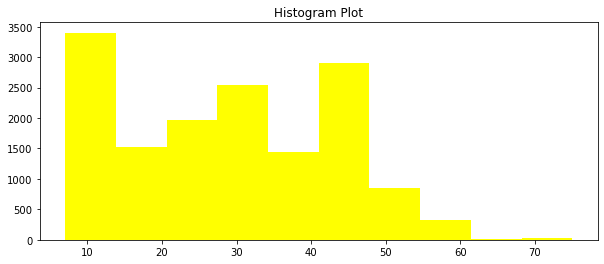

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


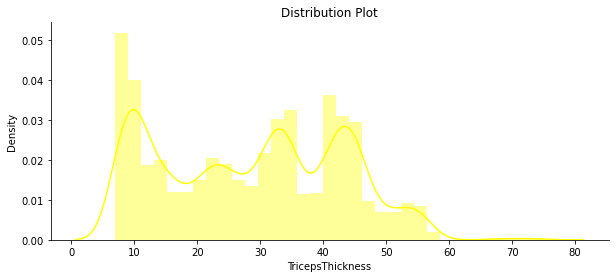

In [51]:
df2 = df2.pipe(IQR_outliers, 'TricepsThickness')
Box_plots(df2["TricepsThickness"],"yellow")
hist_plots(df2["TricepsThickness"],"yellow")
dist_plots(df2["TricepsThickness"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


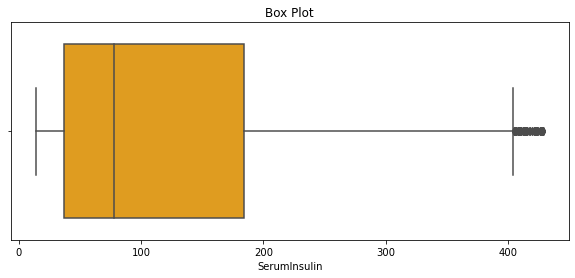

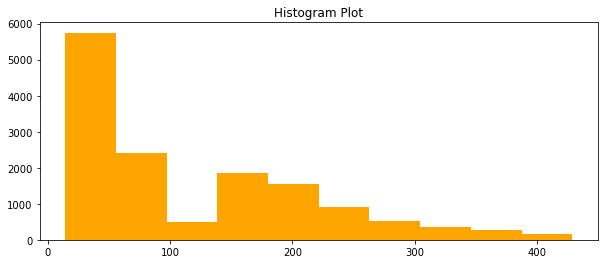

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


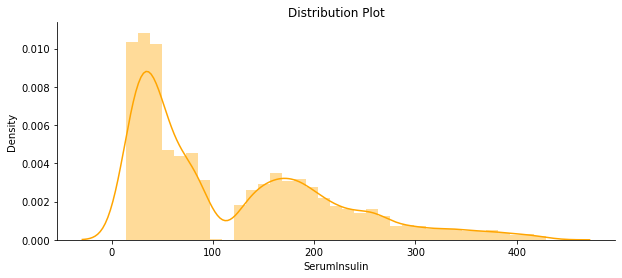

In [52]:
df2 = df2.pipe(IQR_outliers, 'SerumInsulin')
Box_plots(df2["SerumInsulin"],"orange")
hist_plots(df2["SerumInsulin"],"orange")
dist_plots(df2["SerumInsulin"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


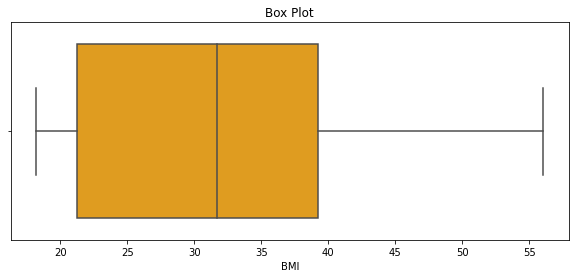

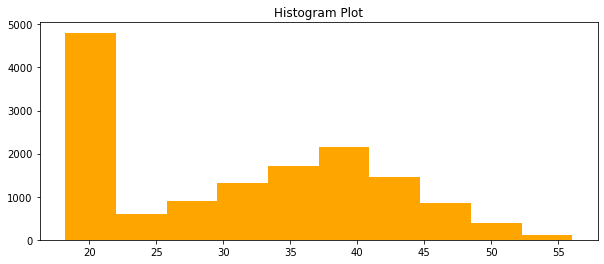

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


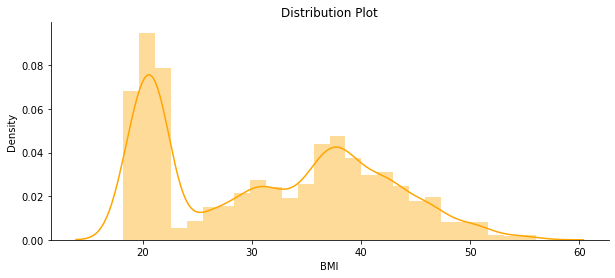

In [53]:
df2 = df2.pipe(IQR_outliers, 'BMI')
Box_plots(df2["BMI"],"orange")
hist_plots(df2["BMI"],"orange")
dist_plots(df2["BMI"],"orange")

In [54]:
df2.shape

(14306, 10)

In [55]:
def IQR_imputation(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df.loc[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))), column] = np.mean(df[column])
     return df

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


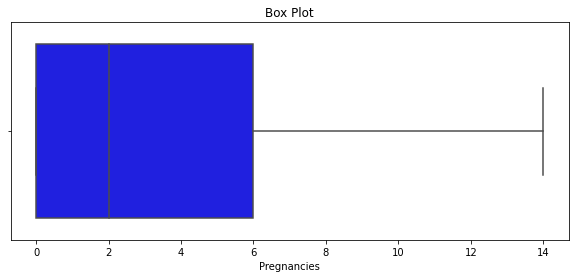

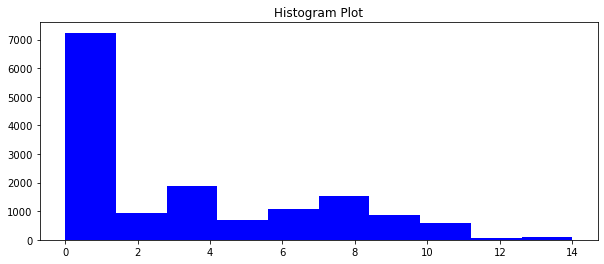

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


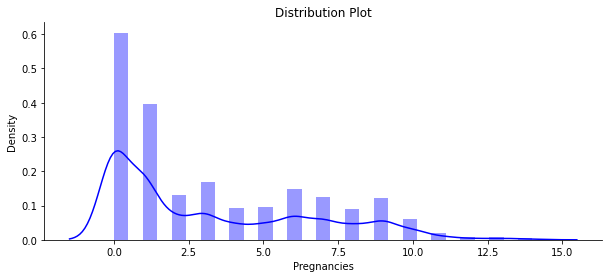

In [58]:
df1 = df1.pipe(IQR_imputation, 'Pregnancies')
Box_plots(df1["Pregnancies"],"blue")
hist_plots(df1["Pregnancies"],"blue")
dist_plots(df1["Pregnancies"],"blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


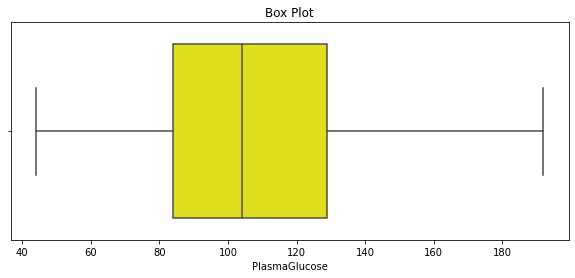

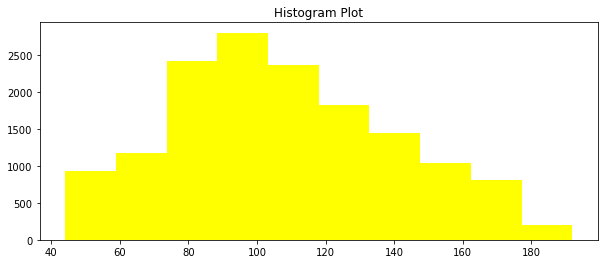

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


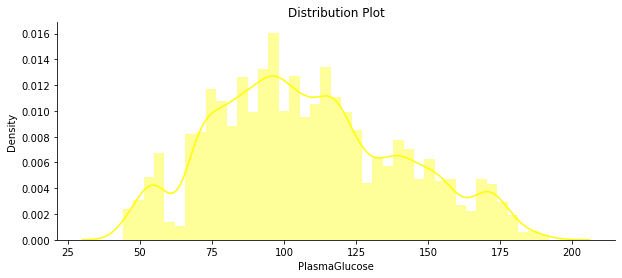

In [59]:
df1 = df1.pipe(IQR_imputation, 'PlasmaGlucose')
Box_plots(df1["PlasmaGlucose"],"yellow")
hist_plots(df1["PlasmaGlucose"],"yellow")
dist_plots(df1["PlasmaGlucose"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


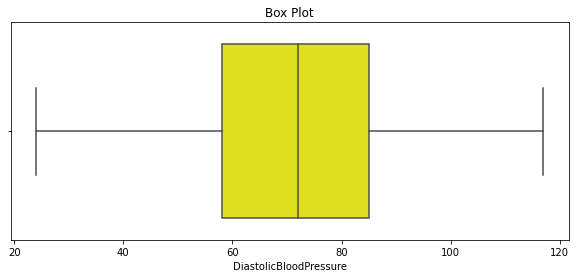

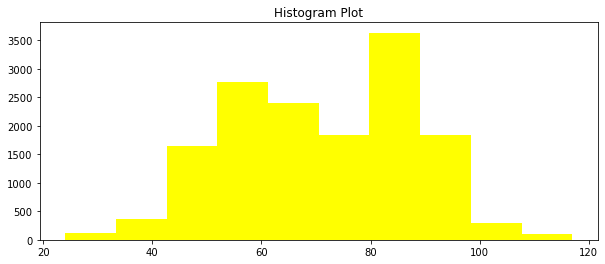

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


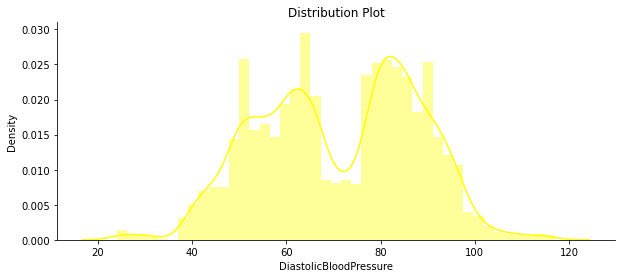

In [60]:
df1 = df1.pipe(IQR_imputation, 'DiastolicBloodPressure')
Box_plots(df1["DiastolicBloodPressure"],"yellow")
hist_plots(df1["DiastolicBloodPressure"],"yellow")
dist_plots(df1["DiastolicBloodPressure"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


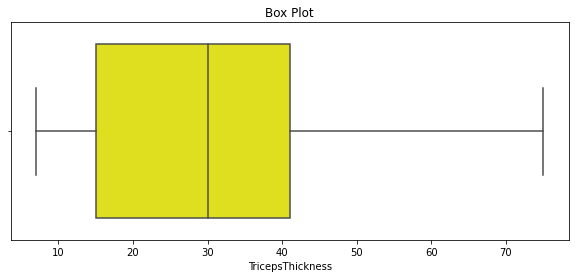

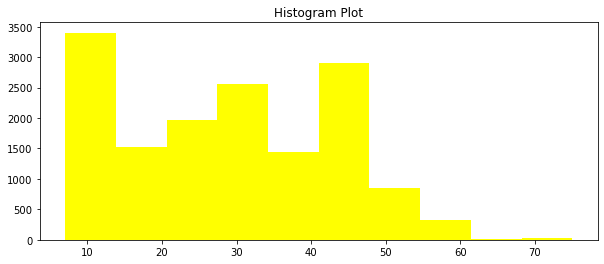

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


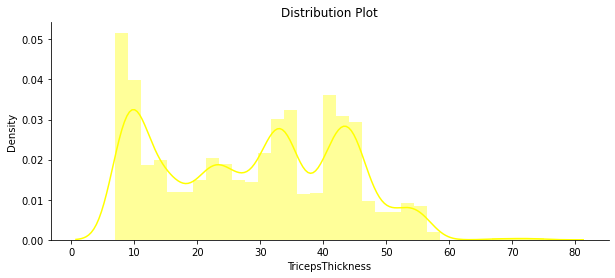

In [61]:
df1 = df1.pipe(IQR_imputation, 'TricepsThickness')
Box_plots(df1["TricepsThickness"],"yellow")
hist_plots(df1["TricepsThickness"],"yellow")
dist_plots(df1["TricepsThickness"],"yellow")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


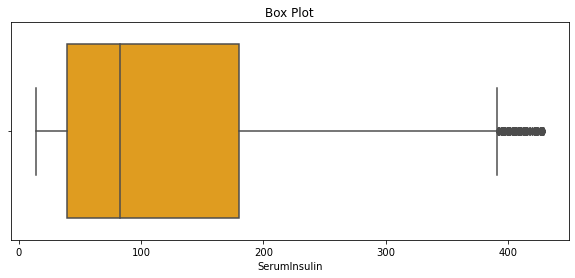

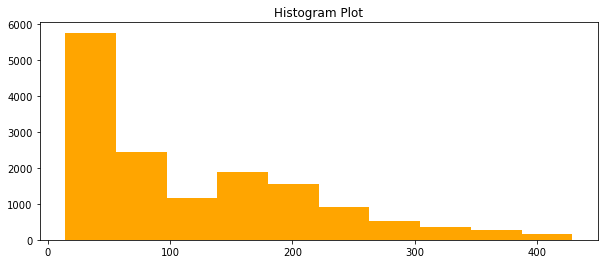

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


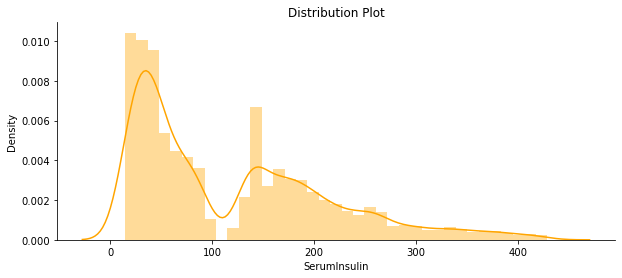

In [62]:
df1 = df1.pipe(IQR_imputation, 'SerumInsulin')
Box_plots(df1["SerumInsulin"],"orange")
hist_plots(df1["SerumInsulin"],"orange")
dist_plots(df1["SerumInsulin"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


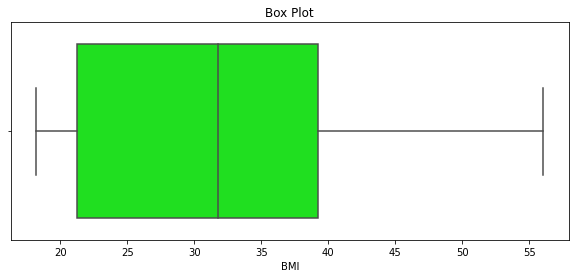

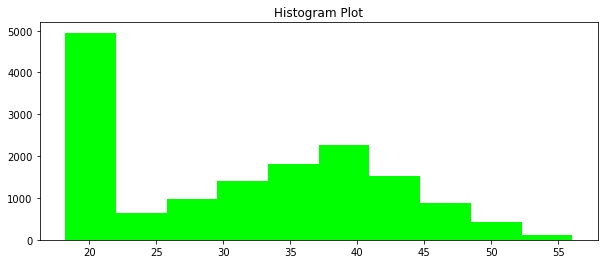

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


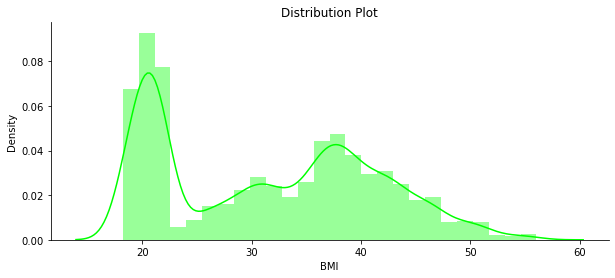

In [67]:
df1 = df1.pipe(IQR_imputation, 'BMI')
Box_plots(df1["BMI"],"lime")
hist_plots(df1["BMI"],"lime")
dist_plots(df1["BMI"],"lime")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


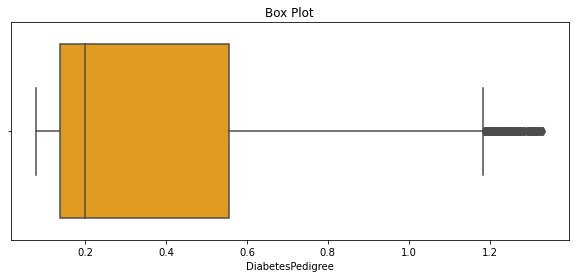

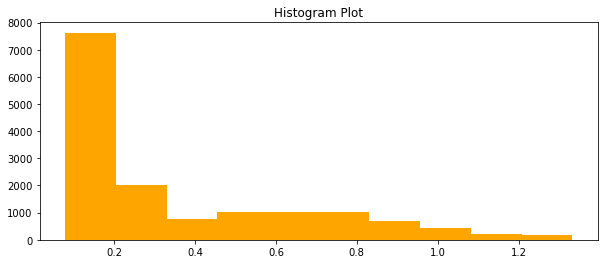

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


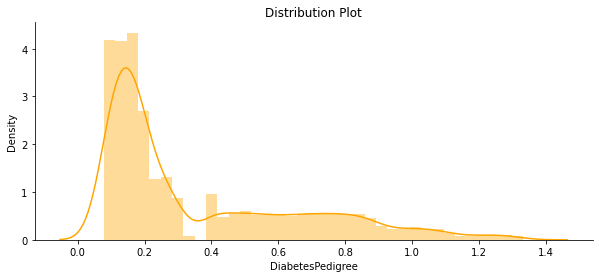

In [64]:
df1 = df1.pipe(IQR_imputation, 'DiabetesPedigree')
Box_plots(df1["DiabetesPedigree"],"orange")
hist_plots(df1["DiabetesPedigree"],"orange")
dist_plots(df1["DiabetesPedigree"],"orange")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


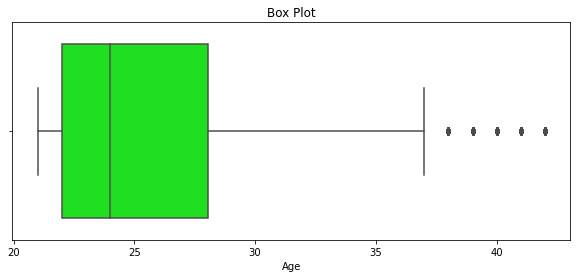

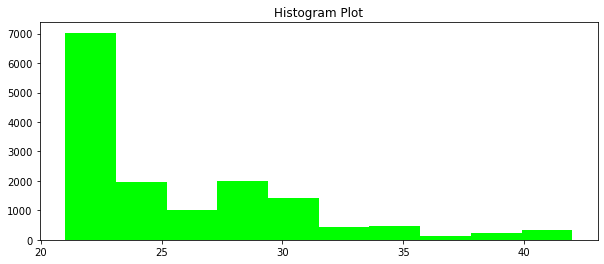

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


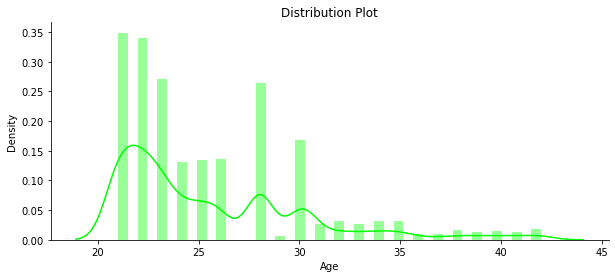

In [66]:
df1 = df1.pipe(IQR_imputation, 'Age')
Box_plots(df1["Age"],"lime")
hist_plots(df1["Age"],"lime")
dist_plots(df1["Age"],"lime")

In [69]:
df1.shape

(15000, 10)